# O que faz um jogo ter sucesso ?

O objetivo desse projeto é identificar padrões nos dados da loja online Ice Games, que a equipe de vendas e marketing possa usar para elaborar estratégias publicitárias e de venda. A loja Ice vende para o mundo todo, sendo assim temos dados amostrais de populações diferentes. Temos as avaliações de usuários e especialistas, gêneros, plataformas (por exemplo, Xbox ou PlayStation).

Os dados disponíveis são de até 2016 a estratégia é identificar os padrões para as vendas de 2017.

## Preparando os dados.

In [5]:
# bibliotecas usadas.
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [6]:
# Salvando os arquivos em data.
data = pd.read_csv('datasets/games.csv')

### Visualização geral dos dados

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [9]:
data.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [10]:
data.duplicated().sum()

0

Nessa visualização inicial, já foi possível identificar 7 colunas com valores ausentes e 3 colunas com os tipos errados. Os nomes das colunas têm as primeiras letras maiúsculas. As strings das colunas "name" e "genre" também estão com as primeiras letras maiúsculas.

### Corrigindo formatação.

Antes de corrigir os valores ausentes vou renomear as colunas e trocar a formatação das strings de "genre" e "name. Assim ficará mais fácil de consultar e manipular esses dados . 

In [11]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [12]:
data = data.rename(
    columns={'Name':'name',
             'Platform':'plantform',
             'Year_of_Release':'year',
             'Genre':'genre',
             'NA_sales':'na_sales',
             'EU_sales':'eu_sales',
             'JP_sales':'jp_sales',
             'Other_sales':'other_sales',
             'Critic_Score':'critic_score',
             'User_Score':'user_score',
             'Rating':'rating'})
data.columns

Index(['name', 'plantform', 'year', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [13]:
data['name'] = data['name'].str.strip().str.lower()

In [14]:
data['genre'] = data['genre'].str.strip().str.lower()

### Correção dos valores ausentes.

In [15]:
data.query('year == 2016').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 502 entries, 94 to 16714
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          502 non-null    object 
 1   plantform     502 non-null    object 
 2   year          502 non-null    float64
 3   genre         502 non-null    object 
 4   na_sales      502 non-null    float64
 5   eu_sales      502 non-null    float64
 6   jp_sales      502 non-null    float64
 7   other_sales   502 non-null    float64
 8   critic_score  232 non-null    float64
 9   user_score    296 non-null    object 
 10  rating        280 non-null    object 
dtypes: float64(6), object(5)
memory usage: 47.1+ KB


Os dados de 2016 possuem valores ausentes. Talvez esses valores estejam faltando porque os dados são de 2016 e as colunas faltantes só são adicionadas ao jogo depois de um certo período em que haja dados suficientes para preencher essas colunas.

In [16]:
aux = data.query('critic_score.isna() == True and user_score.isna() == True')
aux.query('rating.isna() == True').shape

(6621, 11)

In [17]:
aux

,name,plantform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,NES,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,GB,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,GB,1989.0,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,NES,1984.0,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,DS,2005.0,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,PS3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,lma manager 2007,X360,2006.0,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,haitaka no psychedelica,PSV,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,spirits & spells,GBA,2003.0,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Existem 6663 linhas com valores faltantes nas mesmas colunas. Elas não parecem ter um padrão, os valores estão ausentes para várias plataformas e anos diferentes. É difícil determinar o que causou os valores ausentes, provavelmente foi um erro de processamento.

#### Coluna "name".

In [18]:
data[data['name'].isna()]

,name,plantform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [19]:
data.query('year == 1993 and plantform == "GEN" ')

,name,plantform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
7885,shining force ii,GEN,1993.0,strategy,0.00,0.00,0.19,0.00,NaN,NaN,NaN
8893,super street fighter ii,GEN,1993.0,fighting,0.00,0.00,0.15,0.00,NaN,NaN,NaN
11986,ecco: the tides of time,GEN,1993.0,adventure,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12098,street fighter ii': special champion edition (...,GEN,1993.0,action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12264,streets of rage 3,GEN,1993.0,action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12984,dynamite headdy,GEN,1993.0,platform,0.00,0.00,0.05,0.00,NaN,NaN,NaN
13343,beyond oasis,GEN,1993.0,role-playing,0.00,0.00,0.05,0.00,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [20]:
data = data[data['name'].isna() == False]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16713 non-null  object 
 1   plantform     16713 non-null  object 
 2   year          16444 non-null  float64
 3   genre         16713 non-null  object 
 4   na_sales      16713 non-null  float64
 5   eu_sales      16713 non-null  float64
 6   jp_sales      16713 non-null  float64
 7   other_sales   16713 non-null  float64
 8   critic_score  8137 non-null   float64
 9   user_score    10014 non-null  object 
 10  rating        9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


A coluna "name" tem dois valores ausentes que estão sem o nome, gênero, critic_score, user_score e rating. Não é possível descobrir qual é o jogo e não há informações úteis nas outras linhas devido à falta de informações. A melhor opção é excluir essas duas linhas.

#### Coluna "Year_of_release".

In [21]:
data['year'].isna().sum()

269

In [22]:
aux = data.pivot_table(index='plantform',columns='genre',values='year',aggfunc='median')
aux.head()

genre,action,adventure,fighting,misc,platform,puzzle,racing,role-playing,shooter,simulation,sports,strategy
plantform,,,,,,,,,,,,
2600,1982.0,1983.0,1980.0,1980.0,1982.0,1982.0,1982.0,NaN,1981.0,1981.0,1981.5,NaN
3DO,NaN,1995.0,NaN,NaN,NaN,1994.0,NaN,NaN,NaN,1995.0,NaN,NaN
3DS,2013.0,2014.0,2012.5,2013.0,2013.0,2012.0,2011.0,2013.0,2011.0,2013.0,2011.0,2014.0
DC,2000.0,2000.0,2000.0,NaN,1999.5,NaN,1999.5,2000.0,2000.0,1999.0,1999.0,NaN
DS,2008.0,2008.0,2007.0,2008.0,2007.0,2008.0,2008.0,2008.0,2008.0,2008.0,2008.0,2008.0


In [23]:
def func_sub(s1,s2):
    try:
        return aux[s1][s2]
    except:
        return float('nan')

Função para substituir valores ausentes.

In [24]:
aux = data.apply(lambda row:func_sub(row['genre'],row['plantform']),axis=True)
data['year'] = data['year'].fillna(aux)
data['year'].isna().sum()

0

A coluna "year" possui poucos valores ausentes. Vou preenchê-los com a mediana dos anos por gênero para cada plataforma, pois não pode haver jogos com um ano anterior ao lançamento do console.

#### Coluna "critic_score".

In [25]:
data['critic_score'].isna().sum()

8576

In [26]:
data[data['critic_score'].isna()].head()

,name,plantform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,NES,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,GB,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,GB,1989.0,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,NES,1984.0,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,DS,2005.0,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


In [27]:
data['critic_score'] = data['critic_score'].fillna(0)

A coluna "critic_score" possui muitos valores ausentes. Preencher esses valores com dados combinados pode distorcer os dados existentes. Portanto, decidi preencher apenas com 0, e posteriormente adicionarei um filtro para desconsiderar esses valores.

#### Coluna "user_score".

In [28]:
data['user_score'].isna().sum()

6699

In [29]:
data['user_score'].describe()

count     10014
unique       96
top         tbd
freq       2424
Name: user_score, dtype: object

In [30]:
data['user_score'] = data['user_score'].replace('tbd','NaN')
data['user_score'] = data['user_score'].fillna(0)
data['user_score'] = data['user_score'].astype('float64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16713 non-null  object 
 1   plantform     16713 non-null  object 
 2   year          16713 non-null  float64
 3   genre         16713 non-null  object 
 4   na_sales      16713 non-null  float64
 5   eu_sales      16713 non-null  float64
 6   jp_sales      16713 non-null  float64
 7   other_sales   16713 non-null  float64
 8   critic_score  16713 non-null  float64
 9   user_score    14289 non-null  float64
 10  rating        9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


In [31]:
data['user_score'].isna().sum()

2424

Na primeira contagem dos valores ausentes, tivemos 6699 resultados. No entanto, a coluna possuía o valor "tbd," que depois de uma pesquisa, descobri que esse valor é atribuído a avaliações que não possuem avaliações suficientes para a classificação. Portanto, considerei isso como um valor ausente. Após uma segunda contagem, os valores ausentes subiram para 9123. Portanto, preenchi-os com 0 novamente.

#### Coluna "rating".

In [32]:
data['rating'].isna().sum()

6764

In [33]:
data['rating'] = data['rating'].fillna('RP')

In [34]:
data['rating'].describe()

count     16713
unique        8
top          RP
freq       6767
Name: rating, dtype: object

In [35]:
data[['rating']].head()

,rating
0,E
1,RP
2,E
3,E
4,RP


In [36]:
data['rating'].isna().sum()

0

A coluna "rating" possuía 6764 valores ausentes. Portanto, preenchi-os com "RP," que é a sigla para jogos que ainda vão receber a classificação. Como se trata de uma coluna categórica, o uso de "RP" é adequado, pois pode ser considerado como um valor nulo nesse contexto.

### Corrigindo os tipos.

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16713 non-null  object 
 1   plantform     16713 non-null  object 
 2   year          16713 non-null  float64
 3   genre         16713 non-null  object 
 4   na_sales      16713 non-null  float64
 5   eu_sales      16713 non-null  float64
 6   jp_sales      16713 non-null  float64
 7   other_sales   16713 non-null  float64
 8   critic_score  16713 non-null  float64
 9   user_score    14289 non-null  float64
 10  rating        16713 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


In [38]:
data['year'] = data['year'].astype('int64')

Depois das correções apenas a coluna "year" ficou sem correção do tipo.

### Calculando a receita total por jogo.

In [39]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [40]:
data.head()

,name,plantform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,NES,1985,platform,29.08,3.58,6.81,0.77,0.0,0.0,RP,40.24
2,mario kart wii,Wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,GB,1996,role-playing,11.27,8.89,10.22,1.00,0.0,0.0,RP,31.38


## Análise dos dados.

### Distribuição geral de jogos por plataforma e ano.

array([[<Axes: title={'center': 'year'}>]], dtype=object)

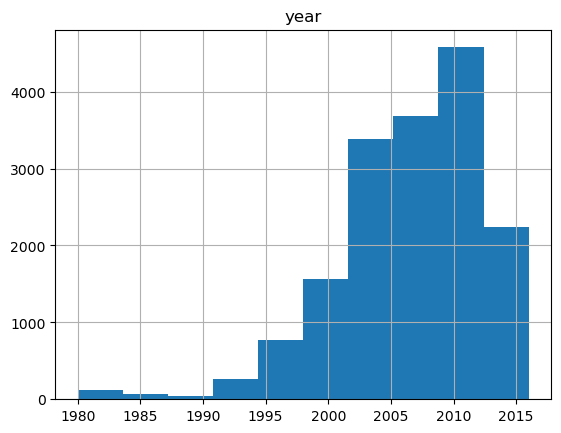

In [41]:
#Lançamento de jogos por ano. 
data.hist('year')

Existem registros de lançamentos de jogos de 1980 a 2016, porém existem poucos dados entre 1980 a 1993.
Escolhi trabalhar com os dados de 2012 a 2016.

In [42]:
#filtro para os dados de 1995 a 2015.
data_fil = data.query('2016 >= year >= 2012')

In [43]:
plantform_pivot = data.pivot_table(index='plantform',values='total_sales',aggfunc=['sum','count','mean','median'])
plantform_pivot.sort_values([('sum','total_sales')],ascending=False)

,sum,count,mean,median
,total_sales,total_sales,total_sales,total_sales
plantform,,,,
PS2,1255.77,2161,0.581106,0.230
X360,971.42,1262,0.769746,0.280
PS3,939.65,1331,0.705973,0.270
Wii,907.51,1320,0.687508,0.190
DS,806.12,2151,0.374765,0.110
PS,730.86,1197,0.610576,0.260
GBA,317.85,822,0.386679,0.160
PS4,314.14,392,0.801378,0.200


O **PS2** é a plataforma que gerou mais renda com seus jogos, mas também foi a plataforma com o maior número de jogos diferentes. Esse comportamento se repete para outras plataformas. A média e a mediana do **PS2** não apresentam valores particularmente especiais em comparação com outras plataformas, o que reforça que a variedade de jogos é o que o torna o líder de vendas.

As plataformas **GB** e **NES** têm as maiores médias e medianas, o que indica a existência de jogos muito rentáveis individualmente para essas plataformas. No entanto, as outras plataformas também podem ter jogos igualmente rentáveis, talvez até mais, mas o volume elevado de jogos faz com que os valores desses jogos se tornem atípicos, o que impacta a média e a mediana. O que torna **GB** e **NES** especiais é a consistência, que mantém a média e a mediana em níveis elevados.

In [44]:
#Listas com as 6 plataformas que venderam mais.
lista_sum = plantform_pivot.sort_values([('sum','total_sales')],ascending=False).head(6).index

#lista com as 6 plataformas que tem a maior média.
lista_mean = plantform_pivot.sort_values([('mean','total_sales')],ascending=False).head(6).index

#lista com as 6 plataformas que tem a maior mediana.
lista_median = plantform_pivot.sort_values([('median','total_sales')],ascending=False).head(6).index

### Distribuição geral de jogos por plataforma e ano.

Text(0.5, 0, 'Distribuição das plataformas que mais vendem')

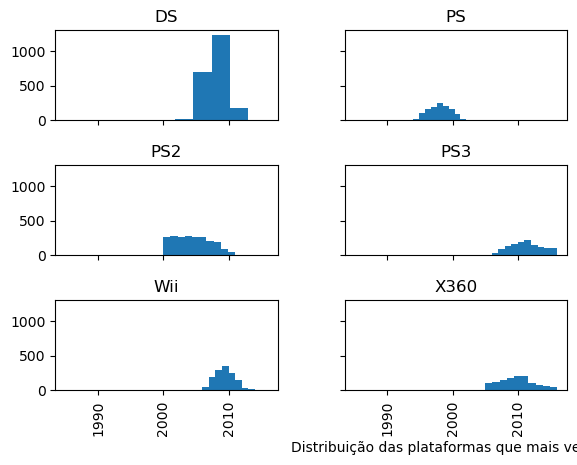

In [45]:
#Distribuição das plataformas que venderam mais.
data[data['plantform'].isin(lista_sum)].hist(column='year', by='plantform', sharey=True, sharex=True)
plt.xlabel('Distribuição das plataformas que mais vendem')

Text(0.5, 0, 'Distribuição das plataformas com as maiores médias')

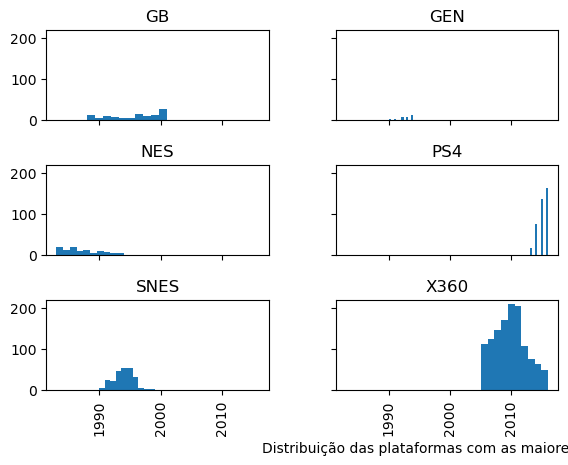

In [46]:
#Distribuição das plataformas que tem a maior média.
data[data['plantform'].isin(lista_mean)].hist(column='year', by='plantform', sharey=True, sharex=True)
plt.xlabel('Distribuição das plataformas com as maiores médias')

Text(0.5, 0, 'Distribuição das plataformas com as maiores medianas')

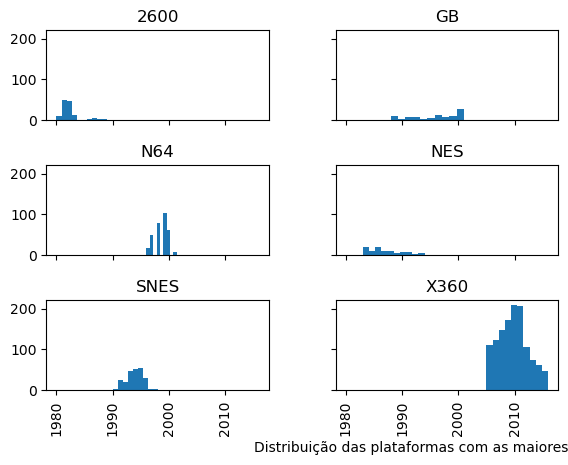

In [47]:
#Distribuição das plataformas que tem a maior mediana.
data[data['plantform'].isin(lista_median)].hist(column='year', by='plantform', sharey=True, sharex=True)
plt.xlabel('Distribuição das plataformas com as maiores medianas')

Eu utilizei medidas diferentes ao selecionar as plataformas para obter uma diversidade maior na hora de comparar as distribuições. É possível perceber que as plataformas têm uma vida útil, e após um certo período, elas deixam de ser relevantes.

### Vida útil das plataformas.
Para realizar uma análise mais detalhada das vendas em relação aos anos, selecionei plataformas com períodos diferentes para fazer uma comparação. Dentre essas plataformas, achei interessante incluir o PS, PS2, PS3 e PS4, que são consoles da mesma empresa, e o lançamento de um afeta as vendas de jogos do outro.

Vou analisar dois consoles de cada década, ou seja, um dos anos 1980, um dos anos 1990 e um dos anos 2000, para verificar se o comportamento dos usuários mudou com o passar do tempo.

Para fazer essa comparação, realizei uma pesquisa para saber o ano de lançamento de cada console, a fim de usá-lo como filtro. Todos os dados que antecedem a data de lançamento foram considerados como erro e, portanto, foram desconsiderados.

In [48]:
aux = data.pivot_table(index=['plantform','year'],values='total_sales',aggfunc='sum')

Text(0, 0.5, 'Receita em milhões')

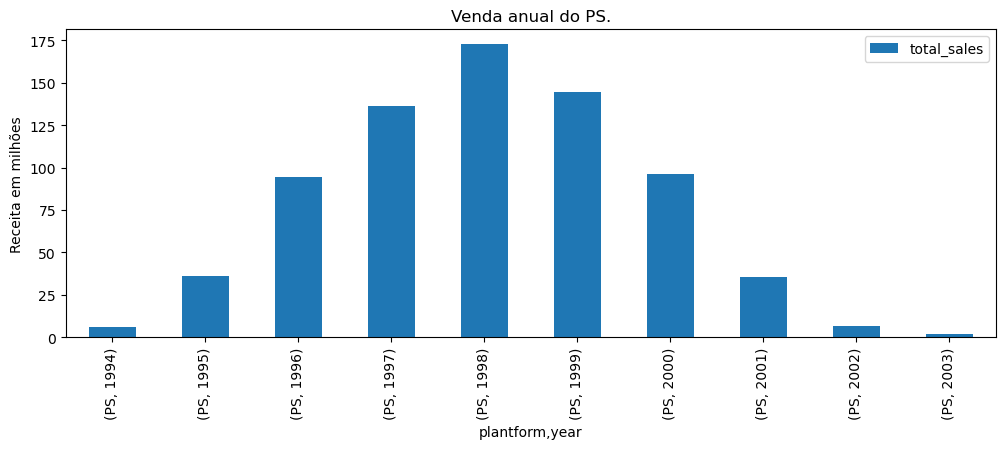

In [49]:
aux.query('plantform == "PS" and year >= 1994').plot(kind='bar',figsize=(12,4))
plt.title('Venda anual do PS.')
plt.ylabel('Receita em milhões')

Text(0, 0.5, 'Receita em milhões')

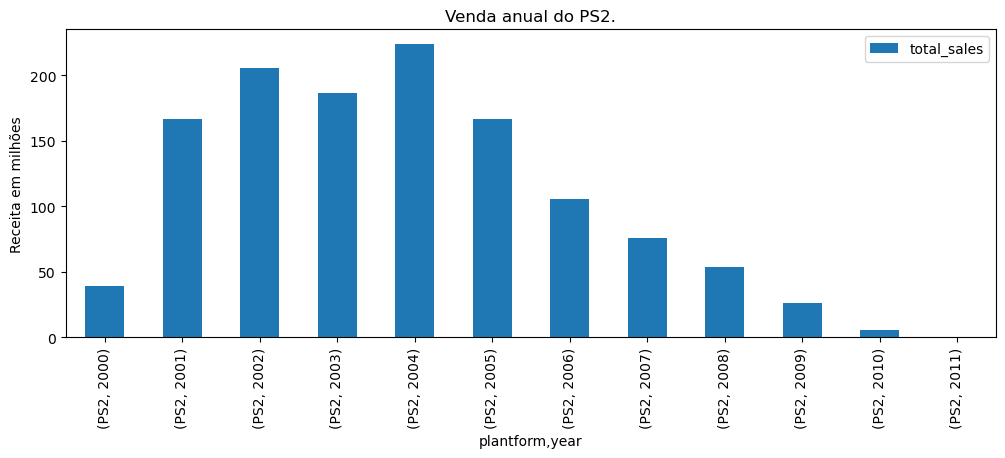

In [50]:
aux.query('plantform == "PS2" and year >= 2000').plot(kind='bar',figsize=(12,4))
plt.title('Venda anual do PS2.')
plt.ylabel('Receita em milhões')

Text(0, 0.5, 'Receita em milhões')

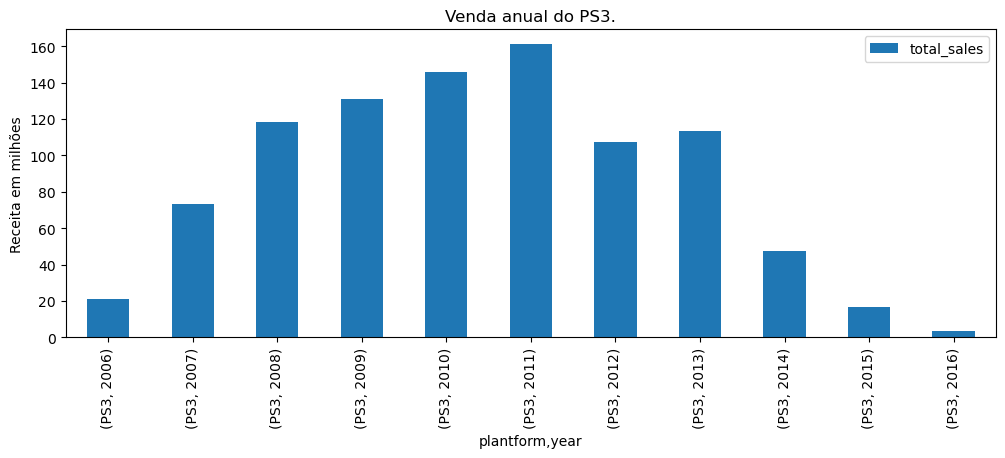

In [51]:
aux.query('plantform == "PS3" and year >= 2006').plot(kind='bar',figsize=(12,4))
plt.title('Venda anual do PS3.')
plt.ylabel('Receita em milhões')

Text(0, 0.5, 'Receita em milhões')

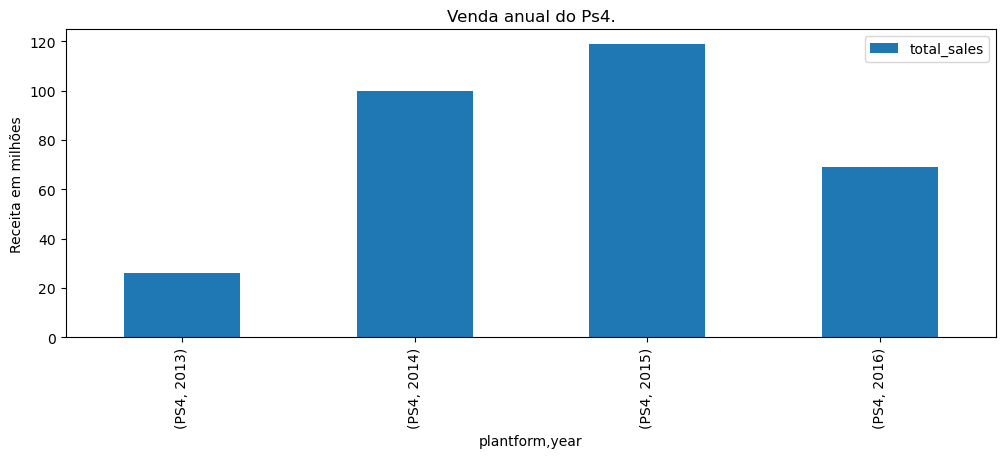

In [52]:
aux.query('plantform == "PS4" and year >= 2006').plot(kind='bar',figsize=(12,4))
plt.title('Venda anual do Ps4.')
plt.ylabel('Receita em milhões')

Os Playstations têm uma duração média de vida útil de 11 anos, com o pico de vendas ocorrendo entre o 3º e o 6º ano, a partir do qual começam a declinar. É possível observar que o console chega ao fim de sua vida no mesmo ano em que seu irmão mais novo está no auge, e a ascensão das vendas de um resulta na queda do outro. Esse comportamento se repete nas três amostras que antecedem o PS4.

Esse padrão provavelmente se repetirá em 2017, que será o auge de vendas do PS4. Minha sugestão é investir em publicidade para os jogos do PS4 e descontinuar a publicidade para os jogos do PS3.

Esse comportamento deve se repetir para outros consoles da mesma "família".

Text(0, 0.5, 'Receita em milhões')

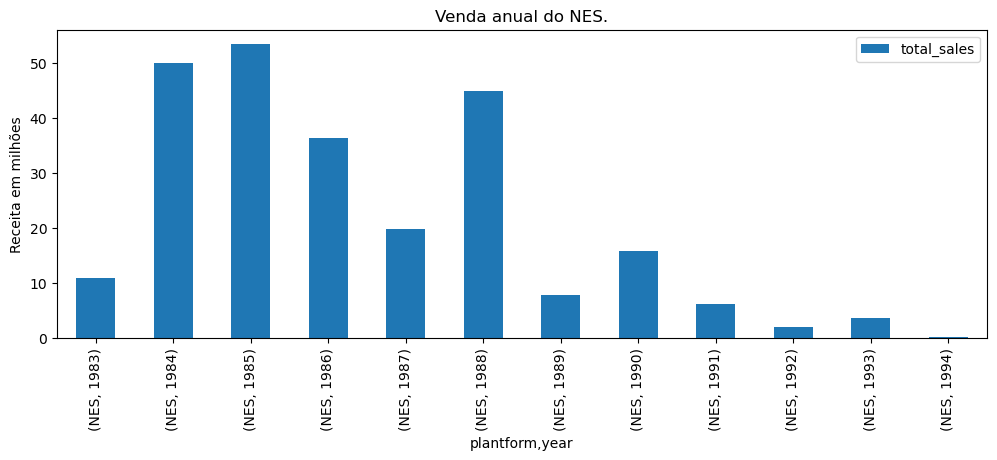

In [53]:
aux.query('plantform == "NES" and year >= 1983').plot(kind='bar',figsize=(12,4))
plt.title('Venda anual do NES.')
plt.ylabel('Receita em milhões')

Text(0, 0.5, 'Receita em milhões')

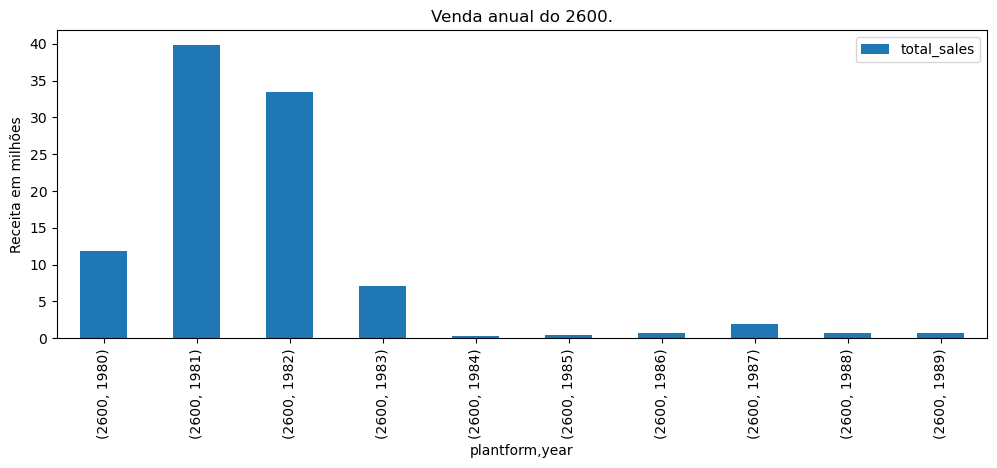

In [54]:
aux.query('plantform == "2600" and year >= 1980').plot(kind='bar',figsize=(12,4))
plt.title('Venda anual do 2600.')
plt.ylabel('Receita em milhões')

Text(0, 0.5, 'Receita em milhões')

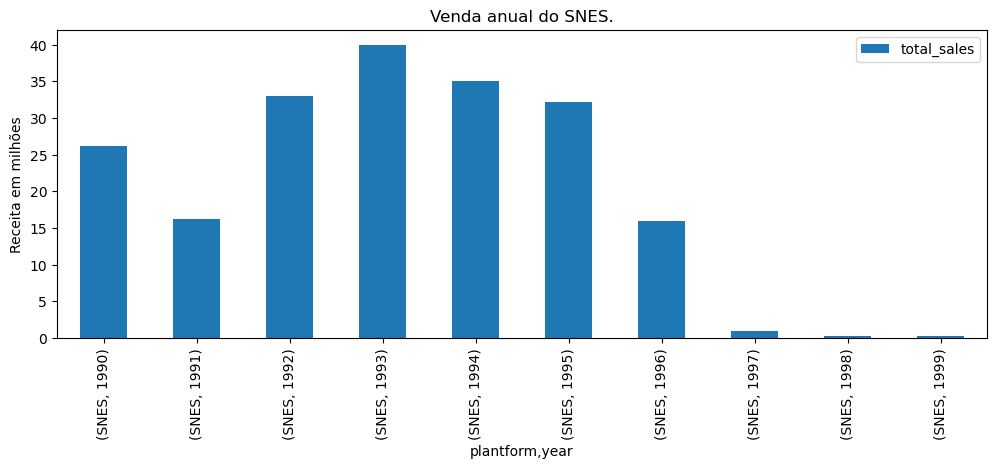

In [55]:
aux.query('plantform == "SNES" and year >= 1990').plot(kind='bar',figsize=(12,4))
plt.title('Venda anual do SNES.')
plt.ylabel('Receita em milhões')

Text(0, 0.5, 'Receita em milhões')

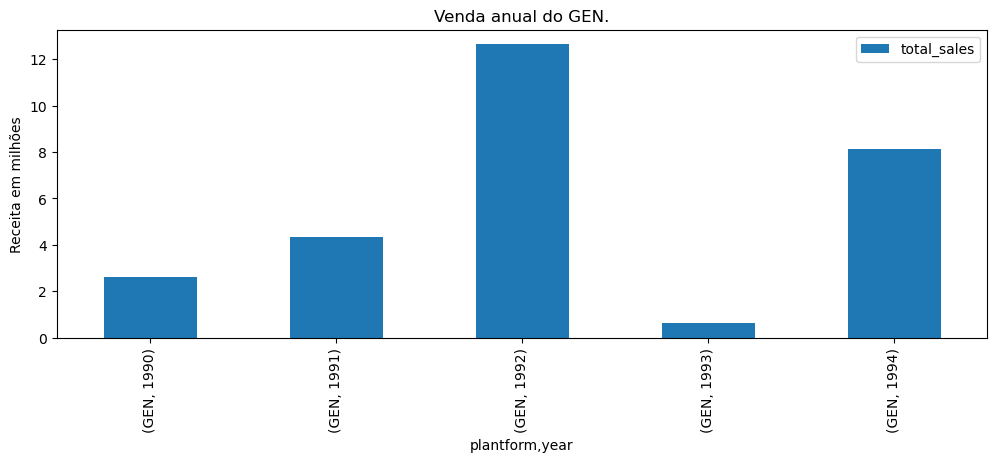

In [56]:
aux.query('plantform == "GEN" and year >= 1990').plot(kind='bar',figsize=(12,4))
plt.title('Venda anual do GEN.')
plt.ylabel('Receita em milhões')

Text(0, 0.5, 'Receita em milhões')

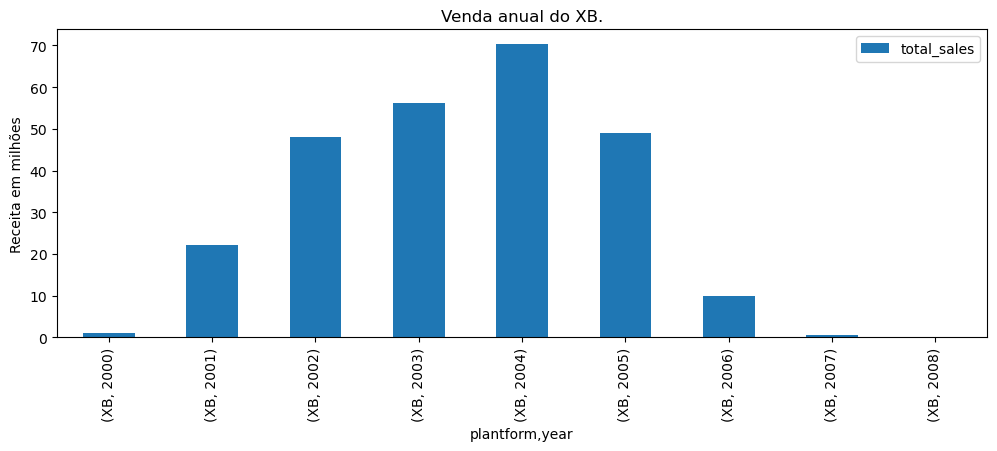

In [57]:
aux.query('plantform == "XB" and year >= 2000').plot(kind='bar',figsize=(12,4))
plt.title('Venda anual do XB.')
plt.ylabel('Receita em milhões')

Text(0, 0.5, 'Receita em milhões')

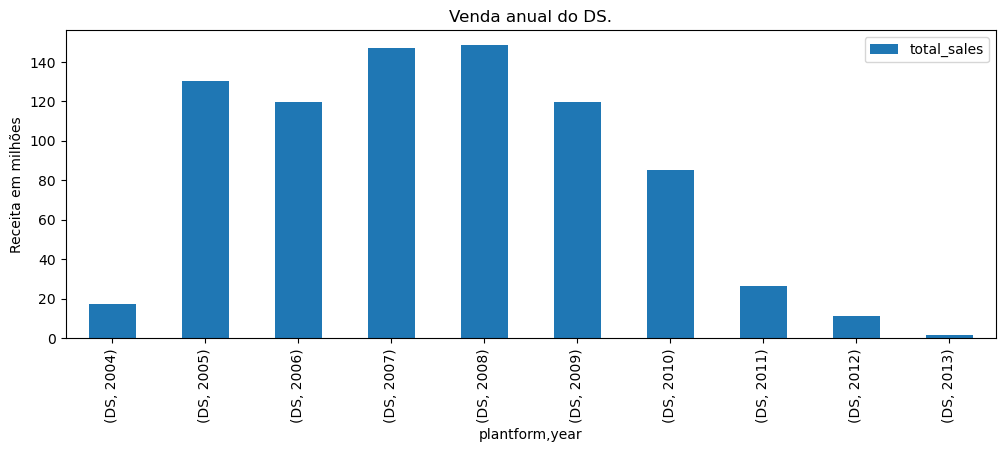

In [58]:
aux.query('plantform == "DS" and year >= 2000').plot(kind='bar',figsize=(12,4))
plt.title('Venda anual do DS.')
plt.ylabel('Receita em milhões')

Observando esses gráficos, chego à conclusão de que o comportamento dos clientes das décadas de 1980, 1990 e 2000 não difere muito. Aparentemente, a média da vida útil dos consoles de sucesso é semelhante, variando de 9 a 11 anos, e o ano médio de pico de vendas também se situa entre 3 a 6 anos. A diferença entre os consoles está em quanto tempo eles conseguem manter um número elevado de vendas.

In [59]:
data_fil.pivot_table(index='plantform',values='total_sales',aggfunc='sum').sort_values('total_sales',ascending=False).head(50)

,total_sales
plantform,
PS4,314.14
PS3,288.88
X360,236.54
3DS,195.62
XOne,159.32
WiiU,82.19
PC,62.79
PSV,49.44
Wii,35.37


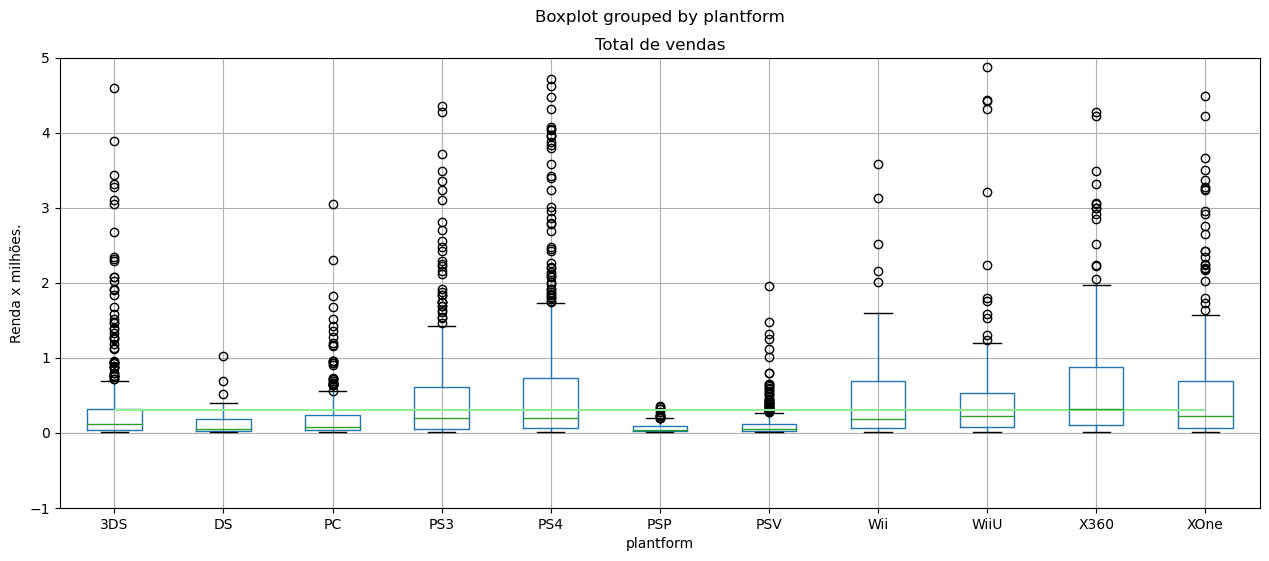

In [60]:
data_fil.boxplot('total_sales',by='plantform',figsize=(15,6))
plt.title('Total de vendas')
plt.ylabel('Renda x milhões.')
plt.ylim(ymin=-1,ymax=5)
plt.hlines(y=0.3,xmin=1,xmax=11,color='lightgreen')

O X360 é a plataforma com a maior mediana e o maior limite interquartil superior.

### Correlação de vendas e avaliações.
Irei usar as 5 plataformas com mais vendas para avaliar como a opinião do usuário e da crítica afetam as vendas por plataforma.



<strong><p style="font-size:22px"> PS2.</p></strong>

,critic_score,total_sales
critic_score,1.000000,0.395435
total_sales,0.395435,1.000000


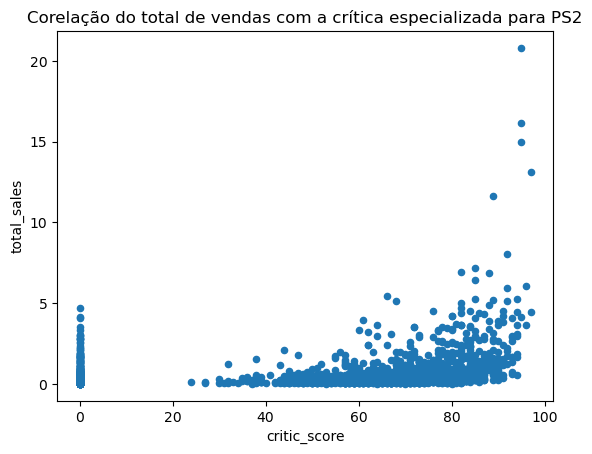

In [61]:
#gráfico da crítica. 
data.query('plantform == "PS2"').sort_values('total_sales').plot(x='critic_score', y='total_sales',kind='scatter')
plt.title('Corelação do total de vendas com a crítica especializada para PS2')
# Matrix de correlação. 
data.query('plantform == "PS2" and critic_score > 0')[['critic_score','total_sales']].corr()

,user_score,total_sales
user_score,1.000000,0.172866
total_sales,0.172866,1.000000


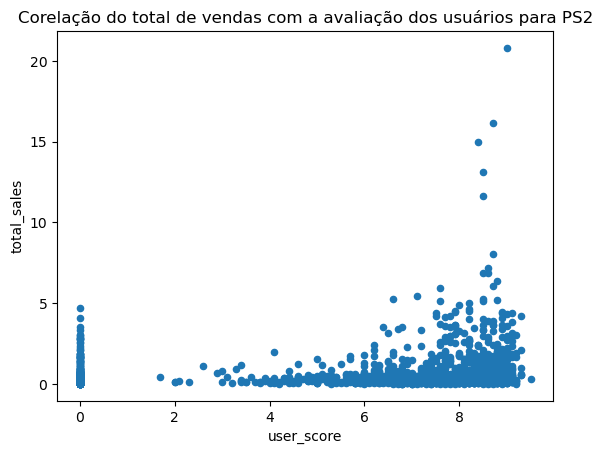

In [62]:
#gráfico da avaliação do usuario.
data.query('plantform == "PS2"').sort_values('total_sales').plot(x='user_score', y='total_sales',kind='scatter')
plt.title('Corelação do total de vendas com a avaliação dos usuários para PS2')
#matrix de correlção.
data.query('plantform == "PS2" and user_score > 0')[['user_score','total_sales']].corr()

Os gráficos das avaliações da crítica e dos usuários são bastante semelhantes, indicando que ambos influenciam o preço. No entanto, ao calcular a correlação, observamos que o preço está mais fortemente correlacionado com a avaliação da crítica.



<strong><p style="font-size:22px"> XBOX360</p></strong>

,critic_score,total_sales
critic_score,1.000000,0.393736
total_sales,0.393736,1.000000


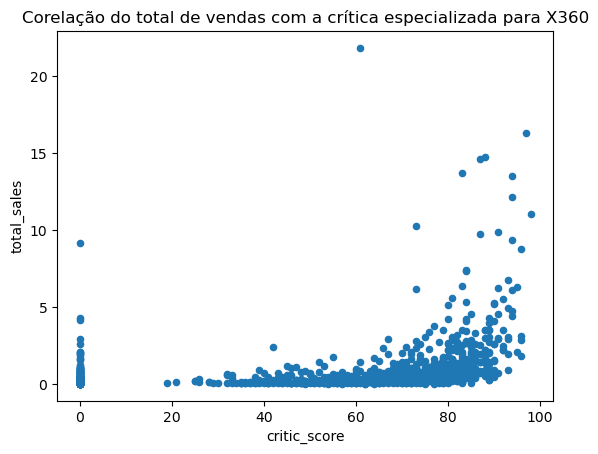

In [63]:
#gráfico da crítica. 
data.query('plantform == "X360"').sort_values('total_sales').plot(x='critic_score', y='total_sales',kind='scatter')
plt.title('Corelação do total de vendas com a crítica especializada para X360')
# Matrix de correlação. 
data.query('plantform == "X360" and critic_score > 0')[['critic_score','total_sales']].corr()

,user_score,total_sales
user_score,1.000000,0.114459
total_sales,0.114459,1.000000


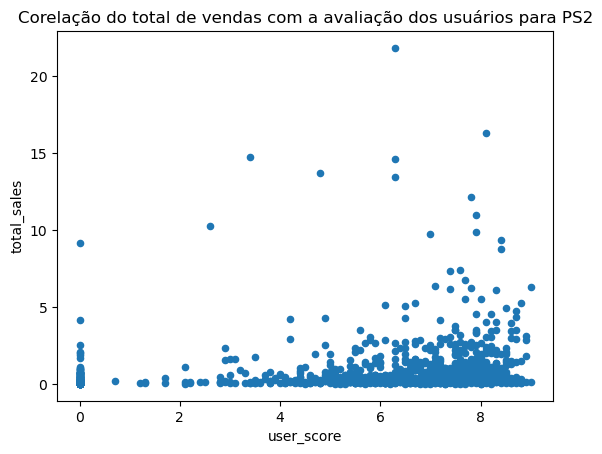

In [64]:
#gráfico da avaliação do usuario.
data.query('plantform == "X360"').sort_values('total_sales').plot(x='user_score', y='total_sales',kind='scatter')
plt.title('Corelação do total de vendas com a avaliação dos usuários para PS2')
#matrix de correlção.
data.query('plantform == "X360" and user_score > 0')[['user_score','total_sales']].corr()

Para o X360 as avaliações da crítica também tem mais influência sobre o preço .



<strong><p style="font-size:22px"> PS3.</p></strong>

,critic_score,total_sales
critic_score,1.000000,0.432432
total_sales,0.432432,1.000000


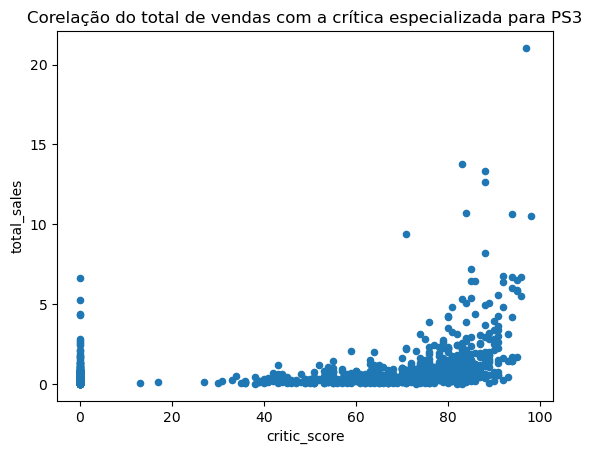

In [65]:
#gráfico da crítica. 
data.query('plantform == "PS3"').sort_values('total_sales').plot(x='critic_score', y='total_sales',kind='scatter')
plt.title('Corelação do total de vendas com a crítica especializada para PS3')
# Matrix de correlação. 
data.query('plantform == "PS3" and critic_score > 0')[['critic_score','total_sales']].corr()

,user_score,total_sales
user_score,1.000000,0.126691
total_sales,0.126691,1.000000


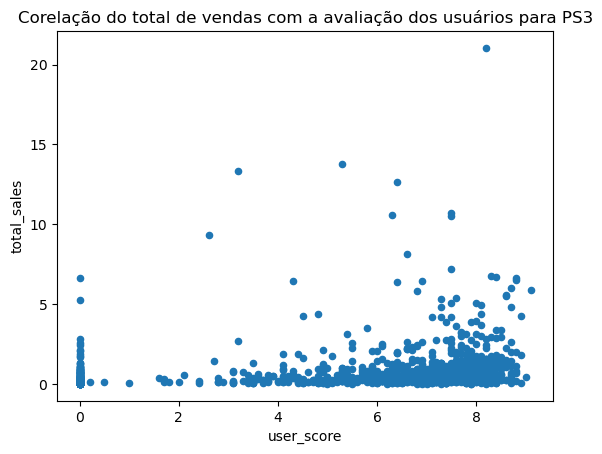

In [66]:
#gráfico da avaliação do usuario.
data.query('plantform == "PS3"').sort_values('total_sales').plot(x='user_score', y='total_sales',kind='scatter')
plt.title('Corelação do total de vendas com a avaliação dos usuários para PS3')
#matrix de correlção.
data.query('plantform == "PS3" and user_score > 0')[['user_score','total_sales']].corr()

O comportamento se repete para o PS3 em relação a PS2 e X360.

<strong><p style="font-size:22px"> Wii.</p></strong>

,critic_score,total_sales
critic_score,1.000000,-0.424341
total_sales,-0.424341,1.000000


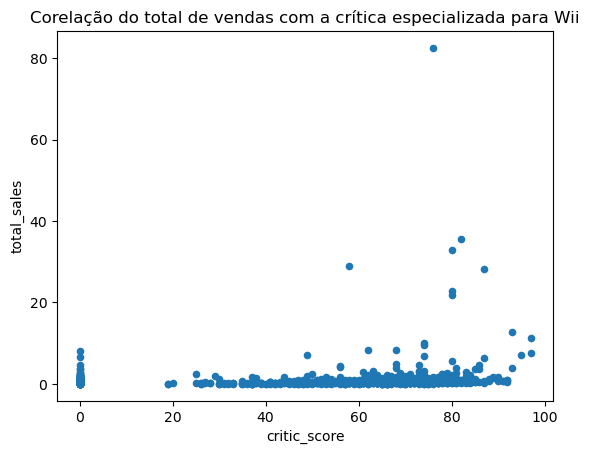

In [67]:
#gráfico da crítica. 
data.query('plantform == "Wii"').sort_values('total_sales').plot(x='critic_score', y='total_sales',kind='scatter')
plt.title('Corelação do total de vendas com a crítica especializada para Wii')
# Matrix de correlação. 
data_fil.query('plantform == "Wii" and critic_score > 0')[['critic_score','total_sales']].corr()

,user_score,total_sales
user_score,1.000000,0.112414
total_sales,0.112414,1.000000


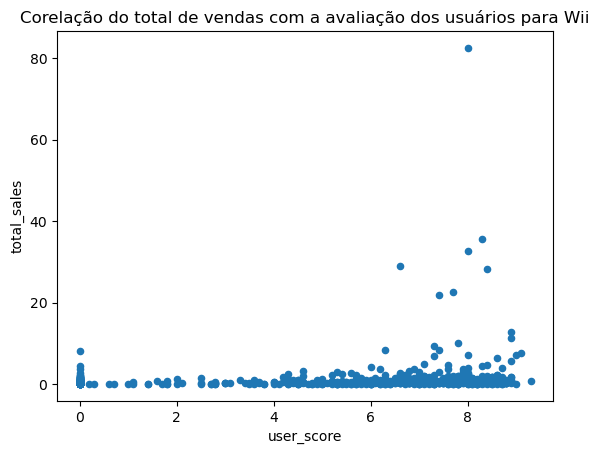

In [68]:
#gráfico da avaliação do usuario.
data.query('plantform == "Wii"').sort_values('total_sales').plot(x='user_score', y='total_sales',kind='scatter')
plt.title('Corelação do total de vendas com a avaliação dos usuários para Wii')
#matrix de correlção.
data.query('plantform == "Wii" and user_score > 0')[['user_score','total_sales']].corr()

Aqui já vemos uma mudança, a correlação da crítica esta é maior do que a dos usuários, mas essa mudança é tão grande em comparação aos outros consoles analisados.



<strong><p style="font-size:22px"> DS.</p></strong>

,critic_score,total_sales
critic_score,1.000000,0.236379
total_sales,0.236379,1.000000


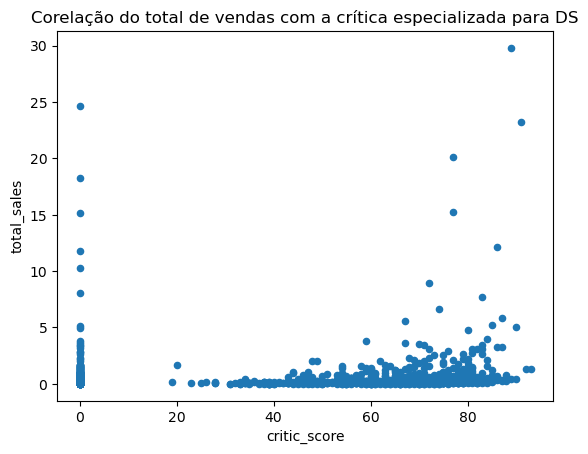

In [69]:
#gráfico da crítica. 
data.query('plantform == "DS"').sort_values('total_sales').plot(x='critic_score', y='total_sales',kind='scatter')
plt.title('Corelação do total de vendas com a crítica especializada para DS')
# Matrix de correlação. 
data.query('plantform == "DS" and critic_score > 0')[['critic_score','total_sales']].corr()

,user_score,total_sales
user_score,1.000000,0.132938
total_sales,0.132938,1.000000


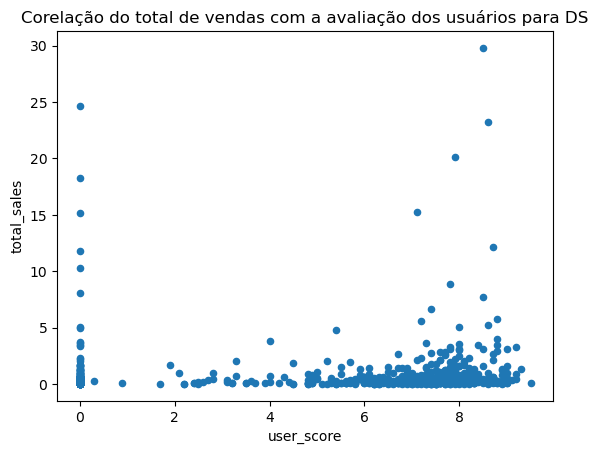

In [70]:
#gráfico da avaliação do usuario.
data.query('plantform == "DS"').sort_values('total_sales').plot(x='user_score', y='total_sales',kind='scatter')
plt.title('Corelação do total de vendas com a avaliação dos usuários para DS')
#matrix de correlção.
data.query('plantform == "DS" and user_score > 0')[['user_score','total_sales']].corr()

O DS apresenta uma correlação com a crítica ligeiramente mais significativa em comparação ao Wii.

Podemos concluir que as avaliações têm influência no preço e que as avaliações da crítica têm mais peso do que as dos usuários, embora a força dessa correlação varie de plataforma para plataforma.

### Comportamento dos mesmos jogos em platafomas diferentes.

In [71]:
data_fil.pivot_table(index=['name','plantform'],values='total_sales').sort_values('total_sales',ascending=False).head(50)

total_sales
name                                      plantform             
grand theft auto v                        PS3              21.05
                                          X360             16.27
call of duty: black ops 3                 PS4              14.63
pokemon x/pokemon y                       3DS              14.60
call of duty: black ops ii                PS3              13.79
                                          X360             13.68
grand theft auto v                        PS4              12.62
pokemon omega ruby/pokemon alpha sapphire 3DS              11.68
call of duty: ghosts                      X360             10.24
new super mario bros. 2                   3DS               9.90
halo 4                                    X360              9.71
call of duty: ghosts                      PS3               9.36
minecraft                                 X360              9.18
animal crossing: new leaf                 3DS               9.17
fifa 16                                   PS4               8.58
fifa soccer 13                            PS3               8.17
pokemon black 2/pokemon white 2           DS                8.06
star wars battlefront (2015)              PS4               7.98
call of duty: advanced warfare            PS4               7.66
fifa 17                                   PS4               7.60
super smash bros. for wii u and 3ds       3DS               7.55
call of duty: black ops 3                 XOne              7.39
fallout 4                                 PS4               7.17
pokemon sun/moon                          3DS               7.14
mario kart 8                              WiiU              7.09
just dance 4                              Wii               6.76
fifa 14                                   PS3               6.46
assassin's creed iii                      PS3               6.44
fifa 15                                   PS4               6.08
the last of us                            PS3               5.86
destiny                                   PS4               5.64
grand theft auto v                        XOne              5.47
uncharted 4: a thief's end                PS4               5.39
assassin's creed iii                      X360              5.29
minecraft                                 PS3               5.27
call of duty: advanced warfare            XOne              5.26
new super mario bros. u                   WiiU              5.23
tomodachi life                            3DS               5.22
fifa soccer 13                            X360              5.16
diablo iii                                PC                5.14
super smash bros. for wii u and 3ds       WiiU              4.87
the last of us                            PS4               4.72
uncharted: the nathan drake collection    PS4               4.62
luigi's mansion: dark moon                3DS               4.59
halo 5: guardians                         XOne              4.49
call of duty: infinite warfare            PS4               4.47
splatoon                                  WiiU              4.44
nintendo land                             WiiU              4.42
call of duty: advanced warfare            PS3               4.36
minecraft                                 PS4               4.32

<p>Criei essa lista para escolher os jogos que serão ultilizados para essa análise, usei como criterio jogos de sucesso que tem em mais de 3 plataformas diferentes.
<p>Os jogos escolhidos são:
    <li>grand theft auto v
    <li>call of duty: black ops 3
    <li>call of duty: black ops ii
    <li>fifa soccer 13	

Text(0.5, 1.0, 'Vendas do GTAV em plataformas diferentes')

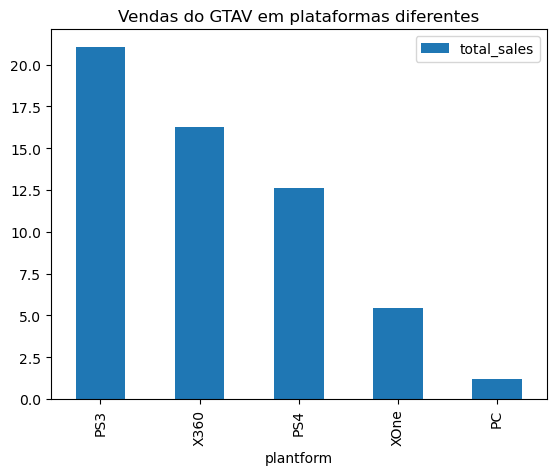

In [89]:
data_fil.query('name == "grand theft auto v"').plot.bar(x='plantform',y='total_sales')
plt.title('Vendas do GTAV em plataformas diferentes')

Text(0.5, 1.0, 'Vendas do call of duty: black ops 3 em plataformas diferentes')

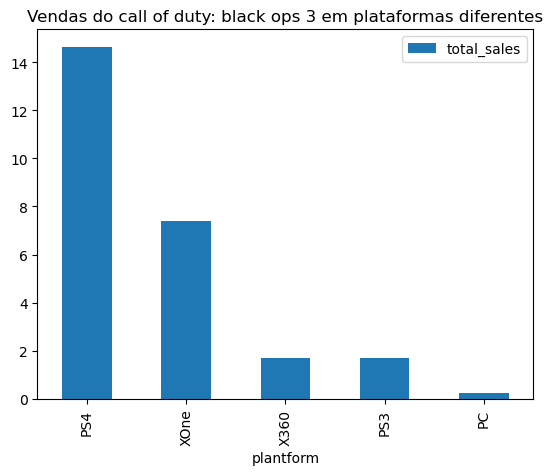

In [91]:
data_fil.query("name == 'call of duty: black ops 3'").plot.bar(x='plantform',y='total_sales')
plt.title('Vendas do call of duty: black ops 3 em plataformas diferentes')

Text(0.5, 1.0, 'Vendas do call of duty: black ops ii em plataformas diferentes')

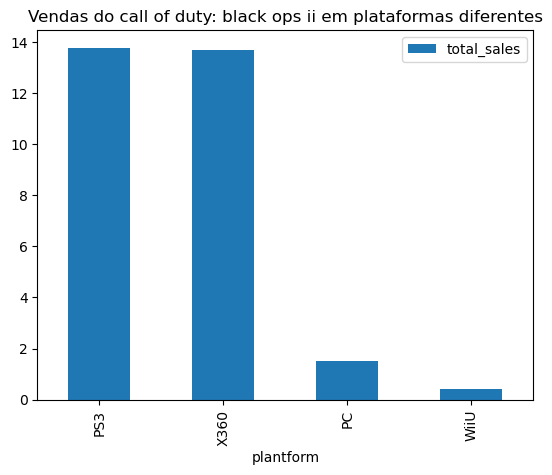

In [92]:
data_fil.query('name == "call of duty: black ops ii"').plot.bar(x='plantform',y='total_sales')
plt.title('Vendas do call of duty: black ops ii em plataformas diferentes')

Text(0.5, 1.0, 'Vendas do fifa soccer 13 em plataformas diferentes')

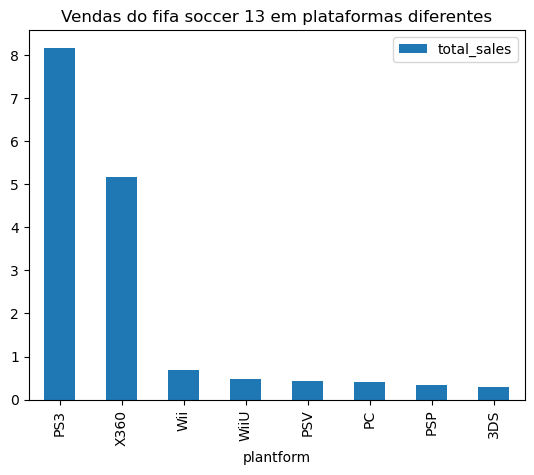

In [93]:
data_fil.query("name == 'fifa soccer 13'").plot.bar(x='plantform',y='total_sales')
plt.title('Vendas do fifa soccer 13 em plataformas diferentes')

As vendas de cada jogo por plataforma variam, sendo que cada jogo tem vendas maiores em plataformas diferentes. O único padrão aqui é que os consoles vendem mais jogos do que o PC.

### Distribuição por gênero.


Text(0.5, 0, 'Distribuição de vendas por gênero.')

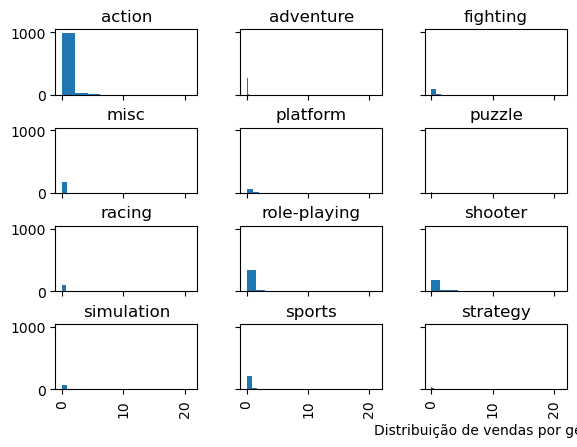

In [76]:
data_fil.hist(column='total_sales', by='genre', sharey=True, sharex=True)
plt.xlabel('Distribuição de vendas por gênero.')

In [77]:
data_fil.pivot_table(index='genre',values='total_sales',aggfunc=['sum','mean','median','count'])\
.sort_values(('sum','total_sales'),ascending=False)

,sum,mean,median,count
,total_sales,total_sales,total_sales,total_sales
genre,,,,
action,441.52,0.427829,0.120,1032
shooter,304.73,1.296723,0.440,235
role-playing,193.15,0.516444,0.140,374
sports,181.07,0.675634,0.240,268
misc,85.04,0.442917,0.120,192
platform,61.00,0.717647,0.210,85
racing,53.50,0.465217,0.140,115
fighting,44.63,0.405727,0.135,110


In [78]:
data_fil.pivot_table(index='genre',values='total_sales',aggfunc=['sum','mean','median','count'])\
.sort_values(('sum','total_sales'),ascending=False).corr()

,,sum,mean,median,count
,,total_sales,total_sales,total_sales,total_sales
sum,total_sales,1.000000,0.525636,0.501724,0.853271
mean,total_sales,0.525636,1.000000,0.986810,0.040021
median,total_sales,0.501724,0.986810,1.000000,0.007156
count,total_sales,0.853271,0.040021,0.007156,1.000000


(-1.0, 4.0)

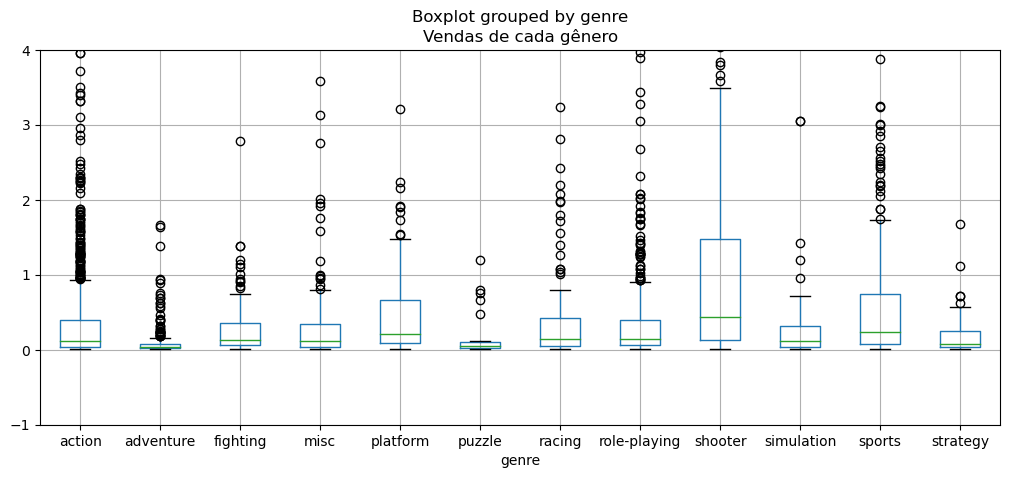

In [94]:
data_fil.boxplot('total_sales',by='genre',figsize=(12,5))
plt.title('Vendas de cada gênero')
plt.ylim(ymin=-1,ymax=4)

O que torna os gêneros mais lucrativos é a quantidade de jogos. Quanto mais jogos, mais lucrativo ele é. Podemos observar que a mediana das vendas de gêneros é bastante semelhante. No entanto, com base nos dados, podemos afirmar que os gêneros de "strategy," "puzzle" e "adventure" não são tão lucrativos. Isso se deve ao fato de que a mediana de vendas desses gêneros está abaixo da mediana de outros gêneros, e a contagem de jogos nesses gêneros não é significativamente menor em relação aos demais.

## Perfil de usuário para cada região.

In [80]:
aux = data_fil.pivot_table(index='plantform',values=['na_sales','eu_sales','jp_sales','other_sales','total_sales'],
                           aggfunc='sum').sort_values('total_sales',ascending=False).head(5)

<Axes: xlabel='plantform'>

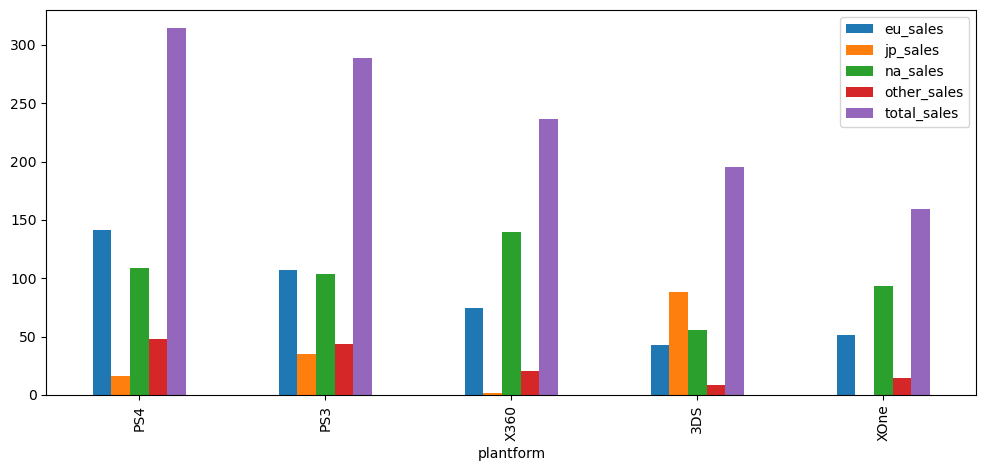

In [81]:
aux.plot(kind='bar',figsize=(12,5))

O PS4 é mais vendido na Europa, o X360 é o mais vendido na América do Norte, e o 3DS é o mais vendido no Japão.

In [82]:
aux = data_fil.pivot_table(index='genre',values=['na_sales','eu_sales','jp_sales','other_sales','total_sales'],
                           aggfunc='sum').sort_values('total_sales',ascending=False).head(5)

<Axes: xlabel='genre'>

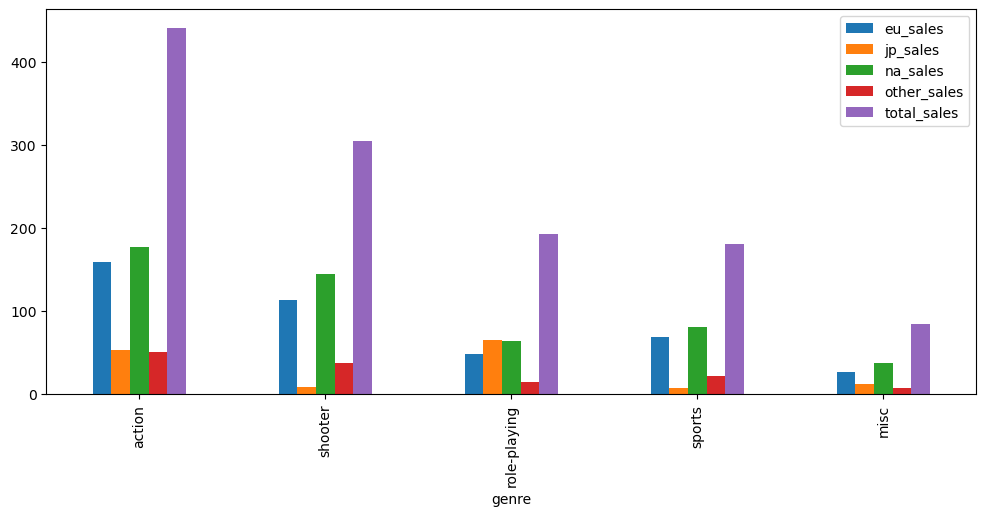

In [83]:
aux.plot(kind='bar',figsize=(12,5))

O gênero de ação parece ser o mais popular em quase todos os países, seguido pelos jogos de tiro (shooter). No entanto, os usuários no Japão têm uma preferência notável pelo gênero de role-playing (jogos de interpretação).

In [84]:
aux = data_fil.pivot_table(index='rating',values=['na_sales','eu_sales','jp_sales','other_sales','total_sales'],
                           aggfunc='sum').sort_values('total_sales',ascending=False)

<Axes: xlabel='rating'>

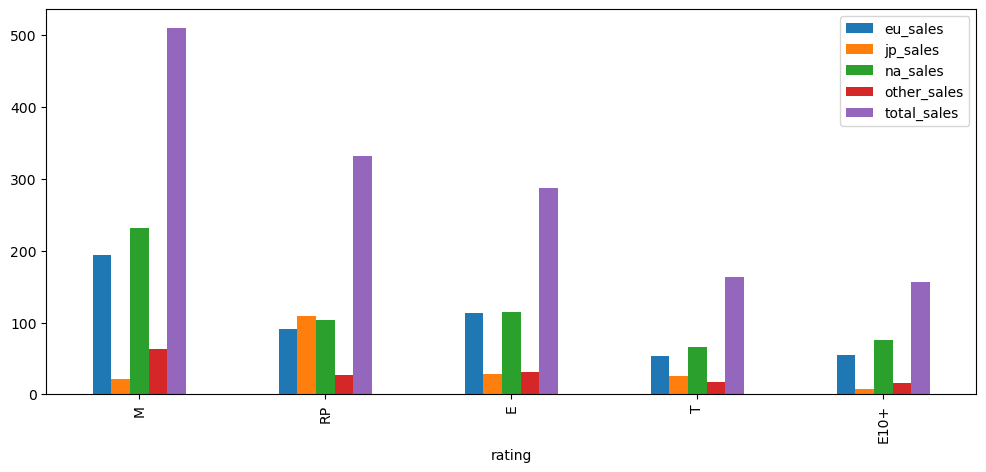

In [85]:
aux.plot(kind='bar',figsize=(12,5))

Os jogos com classificação "Livre" são os mais vendidos, seguidos pelos jogos para maiores de 13 e 17 anos. A classificação "RP" deve ser desconsiderada, já que ela está representando os valores ausentes.

## Análise estatística.

### Teste hipóteses .

As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas ?<br>
Para testar a hipótese de que as classificações médias dos usuários das plataformas Xbox One e PC são as mesmas, podemos utilizar um teste t de amostras independentes . 
<li>$H_0 =$ A hipótese nula: é que as médias são iguais
<li>$H_1 =$ A hipótese alternativa: é que as médias são diferentes.

In [86]:
pc_uc = data.query('user_score > 0 and plantform == "PC"')['user_score']
xone_uc = data.query('user_score > 0 and plantform == "XOne"')['user_score']

alpha = 0.05
results = st.ttest_ind(xone_uc,pc_uc, equal_var=False)

print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print("Nós rejeitamos a hipótese nula")
else:
    print("Nós não podemos rejeitar a hipótese nula")

p-value: 4.935072360183574e-06
Nós rejeitamos a hipótese nula


Podemos rejeitar a hipótese nula, há evidências suficientes para concluir que as classificações médias dos usuários das plataformas Xbox One e PC são estatisticamente diferentes. Para realizar o teste eu filtrei as avaliações maiores que 0 que eram valores ausentes e distorceriam a média.

### Teste hipóteses .

As classificações médias de usuários para os gêneros Action e Sports são diferentes?<br>
Para testar a hipótese de que as classificações médias de usuários para os gêneros Action e Sports são diferentes, podemos utilizar um teste t de amostras independentes .
<li> $H0 =$ Hipótese nula as médias de action e sports são iguais.
<li> $H1 =$ Hipótese alternativa as médias são diferentes.

In [87]:
action_uc = data.query('user_score > 0 and genre == "action"')['user_score']
sport_uc = data.query('user_score > 0 and genre == "sports"')['user_score']

alpha = 0.05
results = st.ttest_ind(action_uc,sport_uc, equal_var=False)

print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print("Nós rejeitamos a hipótese nula")
else:
    print("Nós não podemos rejeitar a hipótese nula")

p-value: 0.11483818791498286
Nós não podemos rejeitar a hipótese nula


Não podemos rejeitar a hipótese nula, existem chances muito altas das classificações médias de usuários para os gêneros "Action" e "Sports" serem iguais.

## Conclusão.

O objetivo dessa análise foi achar padrões para identificar jogos com um grande potencial de vendas com os dados da loja online Ice.<br>
Os dados possuiam erros que necessitavam ser tratados para a análize ser realizada. Foi identificado valores ausentes nas colunas "name", "year_of_release", "genre", "critic_score", "user_score" e "rating", entre outros erros. As nomes das colunas foram transformadas em minusculas e "year_of_release" foi renomeado para "year".<br>
Os erros de cada coluna foi corrigido da segunte forma.
<li>"name" teve as linhas com seus valores faltates exculidas, as linhas eram as mesma em também faltava em "genre" então as duas colunas foram tratadas juntas. Os valores alfábeticos foram transformados em minúsculo e espaços a direita e esquerda eliminados.
<li>"year" teve seus valores substituidos pela média dos anos por gênero e plataforma e seu tipo alterado para inteiro.
<li>"critic_score" foi substituido por 0, poís possuia muitos valores ausentes.
<li>"user_score" também teve seus valores faltantes substituido por zero, mas antes os valores "tbd" convertido para NaN e o tipo alterado para float.
<li>"rating" teve seus valores ausentes preenchidos com "RP".
<br>
<br>Com dados pré-processados começamos as análises, primeiro foi análizado os lançamentos de jogos por ano e foi possivel ver que em 1993 começou uma crescente que não parou de subir.
    Foi selecionado consoles para compararmos a vida útil de cada um deles e qual o período de mais venda. Baseados nos consoles análisados a vida útil dos consoles de sucesso é de 9 a 11 anos e a alta de vendas começa com mais menos 3 anos e dura 6 aproximadamente. Usamos a séries de console da Playstation para ver como o lançamento de novos consoles afetam os antigos, usamos o PS, PS2, PS3 e PS4, baseado neles foi possivel observar que quando um console novo é lançado a versão que a antecede começa a ter quedas nas vendas e desaparecem quando o console novo atinge seu maior pico de vendas esse comportamento deve se repetir para outras séris de console como o xbox por exemplo. O PS4 está entrando em pico em 2016, logo seus jogos tem um potencial de vendas muito grande para 2017,  podemos esperar que esse comportamento sejá o mesmo para consoles com 3 a 6 anos em 2017.<br>
    Com os consoles mais populares foi calculado a correlação das avaliações dos usuários e da crítica, as duas se mostraram afetar as vendas, mas a crítica especializada tem muito mais influência que a avaliação dos usuários.<br>
    O gênero mais lucrativos é ação e em segundo esporte, foi realizado um teste estatístico de hipótese para saber se a média de avaliação dos usuários para os gêneros ação e esporte são diferentes, foi realizado um t teste de student, baseado no resultado não podemos descartar a hipótese dos dois gêneros serem iguais. Também foi identificado os gêneros menos lucrativos que são de aventura, estrategia e pluzze.<br>
    Foi análizado o comportamento dos usuários para cada região venda, assim percebemos que o comportamento dos usuários da América do Norte e Europa são parecidos elas se diferem do Japão. No japão o gênero mais vendido é o "roling-playing". Os gêneros mais vendidos são os de classificação livre quanto maior a classificação de idade menor a venda.<br>
    Por fim tivemos os testes estatíscos testamos se a avaliação média dos usuários do gênero açao e esporte eram diferentes como foi mensionado anteriormente e também foi testado se a média das classificações dos usuários das plataformas Xbox One e PC eram iguais, baseado nos resultados rejeitamos a hipótese deles serem iguais.<br>
    Os jogos com o maior potencial de vendas são aqueles que tem a avaliação da crítica alta, que sejam da categoria ação e esporte para vendas no Ocidente e "roling-playng" para o Japão. Para jogos exclusivos de plataformas o pontecial de venda é maior quando a plataforma tem entre 3 a 6 anos de existência, não vale apena investir em jogos para consoles com 9 a 11 anos.
    
    
    

